# Assignment 4.  




## Queries combining multiple tables

Read chapters 7-11

In this assignment, you will work on "Problems for you to Solve" from Chapters 8, 9, and 11 in *SQL Queries for Mere Mortals*. 

We will use DataJoint to solve these problems and then review the same solutions in SQL.




# Queries with DataJoint

## Connect to the database server


In [1]:
import datajoint as dj

In [2]:
# Execute this only if you have not connected with datajoint before.  
import json
with open('cred.json') as f:
    creds = json.load(f)

dj.config['database.host'] = creds['host']
dj.config['database.user'] = creds['user']
dj.config['database.password'] = creds['password']

dj.config.save_local()

In [4]:
[s for s in dj.list_schemas() if s.startswith('shared_dj')]



['shared_dj_bowling',
 'shared_dj_entertainment',
 'shared_dj_recipes',
 'shared_dj_sales',
 'shared_dj_school',
 'shared_dj_school2']

In [5]:
schema = dj.schema('shared_dj_sales')
schema.spawn_missing_classes()

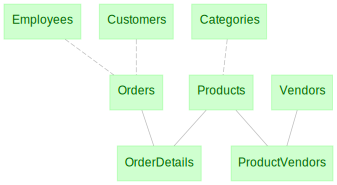

In [6]:
dj.Diagram(schema)

If you could not see the graph, then go to the DataJoint documentation to install `pydotplus`  https://docs.datajoint.io/python/setup/02-DataJoint-Python-Windows-Install-Guide.html

## Simple Query

In [8]:
Customers()

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686
1002,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681
1003,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676
1004,Robert,Brown,672 Lamont Ave,Houston,TX,77201,713,555-2491
1005,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506
1006,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511
1007,Mariya,Sergienko,901 Pine Avenue,Portland,OR,97208,503,555-2526
1008,Neil,Patterson,233 West Valley Hwy,San Diego,CA,92199,619,555-2541
1009,Andrew,Cencini,507 - 20th Ave. E. Apt. 2A,Seattle,WA,98105,206,555-2601
1010,Angel,Kennedy,667 Red River Road,Austin,TX,78710,512,555-2571


## Fetching

In [9]:
arr = Customers().fetch()  # retrieve as a numpy recarray

In [10]:
dicts = Customers().fetch(as_dict=True)  # retrieve as a list of dictionaries

In [11]:
df = Customers().fetch(format='frame')  # retrieve as a pandas dataframe

## Restriction

In [12]:
Customers() & {'cust_state': 'WA'}  # restrict by a dict

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686
1002,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681
1003,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676
1005,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506
1006,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511
1009,Andrew,Cencini,507 - 20th Ave. E. Apt. 2A,Seattle,WA,98105,206,555-2601
1011,Alaina,Hallmark,"Route 2, Box 203B",Woodinville,WA,98072,425,555-2631
1012,Liz,Keyser,13920 S.E. 40th Street,Bellevue,WA,98006,425,555-2556
1020,Joyce,Bonnicksen,2424 Thames Drive,Bellevue,WA,98006,425,555-2726
1023,Julia,Schnebly,2343 Harmony Lane,Seattle,WA,99837,206,555-9936


In [13]:
Customers() & 'cust_state ="WA"'   # restrict by string

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686
1002,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681
1003,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676
1005,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506
1006,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511
1009,Andrew,Cencini,507 - 20th Ave. E. Apt. 2A,Seattle,WA,98105,206,555-2601
1011,Alaina,Hallmark,"Route 2, Box 203B",Woodinville,WA,98072,425,555-2631
1012,Liz,Keyser,13920 S.E. 40th Street,Bellevue,WA,98006,425,555-2556
1020,Joyce,Bonnicksen,2424 Thames Drive,Bellevue,WA,98006,425,555-2726
1023,Julia,Schnebly,2343 Harmony Lane,Seattle,WA,99837,206,555-9936


In [14]:
Customers() & {'customer_id': 1001}

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686


In [15]:
keys = Customers.fetch('KEY')

In [16]:
Customers & keys[2]

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1026,Kirk,DeGrasse,455 West Palm Ave,San Antonio,TX,78284,210,555-2311


In [17]:
# Give me all the products that cost more than $1000
Products() & 'retail_price > 1000'

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
11,GT RTS-2 Mountain Bike,None,1650.00,5,2


## Negative restriction
Customers who are not from WA

In [18]:
Customers() - {'cust_state': 'WA'}

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1004,Robert,Brown,672 Lamont Ave,Houston,TX,77201,713,555-2491
1007,Mariya,Sergienko,901 Pine Avenue,Portland,OR,97208,503,555-2526
1008,Neil,Patterson,233 West Valley Hwy,San Diego,CA,92199,619,555-2541
1010,Angel,Kennedy,667 Red River Road,Austin,TX,78710,512,555-2571
1013,Rachel,Patterson,2114 Longview Lane,San Diego,CA,92199,619,555-2546
1014,Sam,Abolrous,611 Alpine Drive,Palm Springs,CA,92263,760,555-2611
1015,Darren,Gehring,2601 Seaview Lane,Chico,CA,95926,530,555-2616
1016,Jim,Wilson,101 NE 88th,Salem,OR,97301,503,555-2636
1017,Manuela,Seidel,66 Spring Valley Drive,Medford,OR,97501,541,555-2641
1018,David,Smith,311 20th Ave. N.E.,Fremont,CA,94538,510,555-2646


## Projection 

In [19]:
# always includes primary key
Customers.proj()

customer_id
1009
1023
1026
1003
1001
1002
1005
1006
1011
1012


In [20]:
q = Customers.proj('cust_last_name', 'cust_first_name')

In [21]:
q

customer_id,cust_first_name,cust_last_name
1001,Suzanne,Viescas
1002,William,Thompson
1003,Gary,Hallmark
1004,Robert,Brown
1005,Dean,McCrae
1006,John,Viescas
1007,Mariya,Sergienko
1008,Neil,Patterson
1009,Andrew,Cencini
1010,Angel,Kennedy


In [22]:
Products()

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
3,Dog Ear Cyclecomputer,None,75.00,20,1
4,Victoria Pro All Weather Tires,None,54.95,20,4
5,Dog Ear Helmet Mount Mirrors,None,7.45,12,1
6,Viscount Mountain Bike,None,635.00,5,2
7,Viscount C-500 Wireless Bike Computer,None,49.00,30,1
8,Kryptonite Advanced 2000 U-Lock,None,50.00,20,1
9,Nikoma Lok-Tight U-Lock,None,33.00,12,1
10,Viscount Microshell Helmet,None,36.00,20,1


In [23]:
q = Products().proj('product_name', 'retail_price', 
                    stock_value='retail_price * quantity_on_hand')
q 

product_number,product_name,retail_price,stock_value calculated attribute
1,Trek 9000 Mountain Bike,1200.00,7200.00
2,Eagle FS-3 Mountain Bike,1800.00,14400.00
3,Dog Ear Cyclecomputer,75.00,1500.00
4,Victoria Pro All Weather Tires,54.95,1099.00
5,Dog Ear Helmet Mount Mirrors,7.45,89.40
6,Viscount Mountain Bike,635.00,3175.00
7,Viscount C-500 Wireless Bike Computer,49.00,1470.00
8,Kryptonite Advanced 2000 U-Lock,50.00,1000.00
9,Nikoma Lok-Tight U-Lock,33.00,396.00
10,Viscount Microshell Helmet,36.00,720.00


In [24]:
# give me all products whose stock value is over 5000
(q & 'stock_value > 5000').proj('stock_value')

product_number,stock_value calculated attribute
1,7200.00
2,14400.00
11,8250.00
37,7560.00


## Restricting with another query 


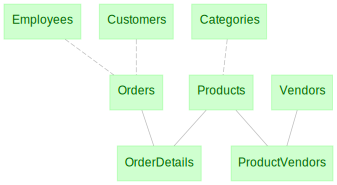

In [25]:
dj.Diagram(schema)

In [26]:
# All customers who have made an order

Customers & Orders

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1001,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686
1002,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681
1003,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676
1004,Robert,Brown,672 Lamont Ave,Houston,TX,77201,713,555-2491
1005,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506
1006,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511
1007,Mariya,Sergienko,901 Pine Avenue,Portland,OR,97208,503,555-2526
1008,Neil,Patterson,233 West Valley Hwy,San Diego,CA,92199,619,555-2541
1009,Andrew,Cencini,507 - 20th Ave. E. Apt. 2A,Seattle,WA,98105,206,555-2601
1010,Angel,Kennedy,667 Red River Road,Austin,TX,78710,512,555-2571


In [27]:
# All customers who have not made an order

Customers - Orders

customer_id,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number
1028,Jeffrey,Tirekicker,19541 104th Ave NE,Bothell,WA,98006,425,555-9999


In [28]:
(Customers & Orders).make_sql()

'SELECT * FROM `shared_dj_sales`.`customers` WHERE ((`customer_id`) in (SELECT `customer_id` FROM `shared_dj_sales`.`orders`))'

In [29]:
# Give me all orders for items whose price exceeds $1000

In [30]:
expensive_products = Products & 'retail_price > 1000'
big_orders = Orders & (OrderDetails & expensive_products)
big_orders

order_number,order_date,ship_date,customer_id,employee_id
1,2017-09-02,2017-09-05,1018,707
3,2017-09-02,2017-09-05,1002,707
4,2017-09-02,2017-09-04,1009,703
5,2017-09-02,2017-09-02,1024,708
6,2017-09-02,2017-09-06,1014,702
10,2017-09-02,2017-09-05,1012,701
11,2017-09-03,2017-09-05,1020,706
13,2017-09-03,2017-09-03,1024,704
14,2017-09-03,2017-09-04,1013,704
15,2017-09-03,2017-09-07,1004,701


In [31]:
big_orders.make_sql()

'SELECT * FROM `shared_dj_sales`.`orders` WHERE ((`order_number`) in (SELECT `order_number` FROM `shared_dj_sales`.`order_details` WHERE ((`product_number`) in (SELECT `product_number` FROM `shared_dj_sales`.`products` WHERE (retail_price > 1000)))))'

In [32]:
# Show all products from the category "Bikes"
bikes = Categories() & 'category_description = "Bikes"'
Products() & bikes

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
6,Viscount Mountain Bike,None,635.00,5,2
11,GT RTS-2 Mountain Bike,None,1650.00,5,2


In [33]:
(Products & bikes).make_sql()

'SELECT * FROM `shared_dj_sales`.`products` WHERE ((`category_id`) in (SELECT `category_id` FROM `shared_dj_sales`.`categories` WHERE (category_description = "Bikes")))'

In [34]:
# All order IDs where the customer was from Washington
washington_customers = Customers & 'cust_state="WA"'
(Orders & washington_customers).proj()

order_number
2
7
16
52
55
107
137
138
151
154


## Joins 

In [35]:
Products * Categories

product_number,category_id,product_name,product_description,retail_price,quantity_on_hand,category_description
3,1,Dog Ear Cyclecomputer,None,75.00,20,Accessories
5,1,Dog Ear Helmet Mount Mirrors,None,7.45,12,Accessories
7,1,Viscount C-500 Wireless Bike Computer,None,49.00,30,Accessories
8,1,Kryptonite Advanced 2000 U-Lock,None,50.00,20,Accessories
9,1,Nikoma Lok-Tight U-Lock,None,33.00,12,Accessories
10,1,Viscount Microshell Helmet,None,36.00,20,Accessories
18,1,Viscount CardioSport Sport Watch,None,179.00,12,Accessories
19,1,Viscount Tru-Beat Heart Transmitter,None,47.00,20,Accessories
20,1,Dog Ear Monster Grip Gloves,None,15.00,30,Accessories
21,1,Dog Ear Aero-Flow Floor Pump,None,55.00,25,Accessories


In [36]:
(Products * Categories & 'category_description = "Bikes"').proj('product_name', 'retail_price')

product_number,category_id,product_name,retail_price
1,2,Trek 9000 Mountain Bike,1200.00
2,2,Eagle FS-3 Mountain Bike,1800.00
6,2,Viscount Mountain Bike,635.00
11,2,GT RTS-2 Mountain Bike,1650.00


In [37]:
(Products & (Categories & 'category_description = "Bikes"')).proj('product_name', 'retail_price')

product_number,product_name,retail_price
1,Trek 9000 Mountain Bike,1200.00
2,Eagle FS-3 Mountain Bike,1800.00
6,Viscount Mountain Bike,635.00
11,GT RTS-2 Mountain Bike,1650.00


In [38]:
# All the orders that took more than 2 days to ship
Orders().proj(days_to_ship='DATEDIFF(ship_date, order_date)') & 'days_to_ship > 2'

order_number,days_to_ship calculated attribute
1,3
3,3
6,4
7,3
9,3
10,3
12,3
15,4
16,4
19,4


In [39]:
ProductVendors()

product_number,vendor_id,wholesale_price,days_to_deliver
1,4,804.00,6
1,9,854.22,7
2,6,1269.00,9
2,9,1477.81,7
3,7,54.19,10
3,9,57.27,6
4,6,44.22,10
4,9,41.62,14
5,7,5.38,10
5,9,5.87,9


In [40]:
discounts = OrderDetails * Products & 'quoted_price < retail_price'
(Orders & discounts).proj('order_date')

order_number,order_date
1,2017-09-02
3,2017-09-02
4,2017-09-02
5,2017-09-02
6,2017-09-02
8,2017-09-02
11,2017-09-03
14,2017-09-03
15,2017-09-03
16,2017-09-03


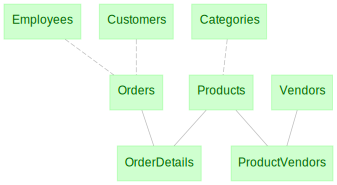

In [41]:
dj.Diagram(schema)

In [42]:
# Find all orders with products that have vendors from TX
Orders & (OrderDetails * Products * ProductVendors * Vendors & 'vend_state = "TX"')

order_number,order_date,ship_date,customer_id,employee_id
1,2017-09-02,2017-09-05,1018,707
2,2017-09-02,2017-09-04,1001,703
3,2017-09-02,2017-09-05,1002,707
4,2017-09-02,2017-09-04,1009,703
5,2017-09-02,2017-09-02,1024,708
6,2017-09-02,2017-09-06,1014,702
7,2017-09-02,2017-09-05,1001,708
8,2017-09-02,2017-09-02,1003,703
9,2017-09-02,2017-09-05,1007,708
10,2017-09-02,2017-09-05,1012,701


In [43]:
# Give all products some vendors are from TX
Products & (ProductVendors * Vendors & 'vend_state="TX"')

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
3,Dog Ear Cyclecomputer,None,75.00,20,1
4,Victoria Pro All Weather Tires,None,54.95,20,4
5,Dog Ear Helmet Mount Mirrors,None,7.45,12,1
6,Viscount Mountain Bike,None,635.00,5,2
8,Kryptonite Advanced 2000 U-Lock,None,50.00,20,1
11,GT RTS-2 Mountain Bike,None,1650.00,5,2
12,Shinoman 105 SC Brakes,None,23.50,16,4
13,Shinoman Dura-Ace Headset,None,67.50,20,4


In [44]:
# Advanced: Give all products where all vendors are from TX
Products - (ProductVendors * Vendors - 'vend_state="TX"')

product_number,product_name,product_description,retail_price,quantity_on_hand,category_id
22,Pro-Sport 'Dillo Shades,None,82.00,18,1
25,King Cobra Helmet,None,139.00,30,1
38,Cycle-Doc Pro Repair Stand,None,166.00,12,1


In [45]:
# rename "retail_price" into "price"
Products().proj(..., price='retail_price')

product_number,product_name,product_description,price,quantity_on_hand,category_id
1,Trek 9000 Mountain Bike,None,1200.00,6,2
2,Eagle FS-3 Mountain Bike,None,1800.00,8,2
3,Dog Ear Cyclecomputer,None,75.00,20,1
4,Victoria Pro All Weather Tires,None,54.95,20,4
5,Dog Ear Helmet Mount Mirrors,None,7.45,12,1
6,Viscount Mountain Bike,None,635.00,5,2
7,Viscount C-500 Wireless Bike Computer,None,49.00,30,1
8,Kryptonite Advanced 2000 U-Lock,None,50.00,20,1
9,Nikoma Lok-Tight U-Lock,None,33.00,12,1
10,Viscount Microshell Helmet,None,36.00,20,1


In [46]:
Customers() * Products()

customer_id,product_number,cust_first_name,cust_last_name,cust_street_address,cust_city,cust_state,cust_zip_code,cust_area_code,cust_phone_number,product_name,product_description,retail_price,quantity_on_hand,category_id
1001,1,Suzanne,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2686,Trek 9000 Mountain Bike,None,1200.00,6,2
1002,1,William,Thompson,122 Spring River Drive,Duvall,WA,98019,425,555-2681,Trek 9000 Mountain Bike,None,1200.00,6,2
1003,1,Gary,Hallmark,"Route 2, Box 203B",Auburn,WA,98002,253,555-2676,Trek 9000 Mountain Bike,None,1200.00,6,2
1004,1,Robert,Brown,672 Lamont Ave,Houston,TX,77201,713,555-2491,Trek 9000 Mountain Bike,None,1200.00,6,2
1005,1,Dean,McCrae,4110 Old Redmond Rd.,Redmond,WA,98052,425,555-2506,Trek 9000 Mountain Bike,None,1200.00,6,2
1006,1,John,Viescas,"15127 NE 24th, #383",Redmond,WA,98052,425,555-2511,Trek 9000 Mountain Bike,None,1200.00,6,2
1007,1,Mariya,Sergienko,901 Pine Avenue,Portland,OR,97208,503,555-2526,Trek 9000 Mountain Bike,None,1200.00,6,2
1008,1,Neil,Patterson,233 West Valley Hwy,San Diego,CA,92199,619,555-2541,Trek 9000 Mountain Bike,None,1200.00,6,2
1009,1,Andrew,Cencini,507 - 20th Ave. E. Apt. 2A,Seattle,WA,98105,206,555-2601,Trek 9000 Mountain Bike,None,1200.00,6,2
1010,1,Angel,Kennedy,667 Red River Road,Austin,TX,78710,512,555-2571,Trek 9000 Mountain Bike,None,1200.00,6,2


In [47]:
OrderDetails() * Orders()

order_number,product_number,quoted_price,quantity_ordered,order_date,ship_date,customer_id,employee_id
1,1,1200.00,2,2017-09-02,2017-09-05,1018,707
1,6,635.00,3,2017-09-02,2017-09-05,1018,707
1,11,1650.00,4,2017-09-02,2017-09-05,1018,707
1,16,28.00,1,2017-09-02,2017-09-05,1018,707
1,21,55.00,3,2017-09-02,2017-09-05,1018,707
1,26,121.25,5,2017-09-02,2017-09-05,1018,707
1,40,174.60,6,2017-09-02,2017-09-05,1018,707
2,27,24.00,4,2017-09-02,2017-09-04,1001,703
2,40,180.00,4,2017-09-02,2017-09-04,1001,703
3,1,1164.00,5,2017-09-02,2017-09-05,1002,707


# Homework

Using the sales schema above, write the following queries in DataJoint:

In [ ]:
# 1. List all products that need to be restocked (less than 10 are left on hand) 
# (6 items)

In [ ]:
# 2. List all orders made since "2018-01-01"
# (350 items)

In [ ]:
# 3. List customers who have never ordered anything.
# (1 item)

In [ ]:
# 4. List all orders for bicycles
# (586 items)

In [ ]:
# 5. List customers whose first name is Liz.
# (1 item)

In [ ]:
# 6. List all orders made by customer Liz.
# (39 items)

In [ ]:
# 7. List all orders made by employees named Susan.
# (130 items)

In [ ]:
# 8. List all employees who have not sold anything to Liz since 2018-01-01
# (1 item)

In [ ]:
# 9. List the names of all the customers to whom Susan has sold something in Sept 2017
# (17 items)

In [ ]:
# 10. List the names of products sold on 2017-09-05
# (14 items)

In [ ]:
# 11. List employees who did not make a sale on 2017-09-05
# (5 items)

In [ ]:
# 12. List empty orders (without any items)
# (11 items)

In [ ]:
# 13. List all orders where the customer and the salesperson are from the same city. 
# (41 items)

In [ ]:
# 14. List all customers who have never bought items over $1000 (quoted price) 
# (5 items)